## Logging and Automation via Twitter API
### Marlene Aviles

Aim:

-Create a twitter account

-Pulling data from Twitter’s publicly available API

-Added Python logging

-Add an automated message to include the failure/success in your message. 

In [ ]:
conda install -c conda-forge twilio 

In [ ]:
conda install -c conda-forge tweepy 

In [ ]:
conda install -c conda-forge python-oauth2

In [ ]:
import tweepy
import oauth2

### Create a Twitter API Key and Access Token 

•	API key: 

•	API secret key: 

•	Access token: 

•	Access token secret: 

### Do a single data pull from Twitter’s REST API 

In [ ]:
import sys

start_date = sys.argv[1] #"201x-mm-dd" 
end_date = sys.argv[2] #"201x-mm-dd" 
consumerKey=" "
consumerSecret=" "
accessToken=" "
accessTokenSecret=" "
keyword= '#childlabor'
lang="en" #language filtered to english 

data={}

In [ ]:
import oauth2

req_count = 0

def oauth_req(url, http_method="GET", post_body=b"", http_headers=None):
    global req_count,consumerKey,consumerSecret,accessToken,accessTokenSecret
    req_count += 1
    
    consumer = oauth2.Consumer(key=consumerKey, secret=consumerSecret)
    token = oauth2.Token(key=accessToken, secret=accessTokenSecret)
    client = oauth2.Client(consumer, token)
    resp, content = client.request( url, method=http_method, body=post_body , headers=http_headers )
    return content

def get_tweets(min_faves):
    global keyword, start_date, end_date, lang
    return oauth_req( 'https://api.twitter.com/1.1/search/tweets.json?' + '&q=' + keyword + '&lang=' + lang + '%20since%3A' + start_date + '%20until%3A' + end_date + '%20min_faves%3A' + str(min_faves) +'&result_type=mixed&count=100')

In [ ]:
print(get_tweets)
print(oauth_req)

### Execute multiple queries at a time from Twitter’s REST API 

In [ ]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler, Stream


API_KEY = ''
API_SECRET = ''
TOKEN_KEY = ''
TOKEN_SECRET = ''


class Listener(StreamListener):

    def on_data(self, data):
        print (data)
        return True

auth = OAuthHandler(API_KEY, API_SECRET)
auth.set_access_token(TOKEN_KEY, TOKEN_SECRET)

stream = Stream(auth, Listener())
stream.filter(track=['child labor'])


### Do a data pull from Twitter’s Streaming API 

In [ ]:
conda install -c coecms dataset

In [ ]:
# Include screenshort of db created for confirmation 

import json
import tweepy
import dataset

API_KEY = ''
API_SECRET = ''
TOKEN_KEY = ''
TOKEN_SECRET = ''

def store_tweet(item):
    db = dataset.connect('sqlite:///data_wrangling.db')
    table = db.create_table('tweets', primary_id=False)
    item_json = item._json.copy()
    for k, v in item_json.items():
        if isinstance(v, dict):
            item_json[k] = str(v)
    table.insert(item_json)


auth = tweepy.OAuthHandler(API_KEY, API_SECRET)
auth.set_access_token(TOKEN_KEY, TOKEN_SECRET)

api = tweepy.API(auth)

query = '#childlabor'
cursor = tweepy.Cursor(api.search, q=query, lang="en")

for page in cursor.pages():
    for item in page:
        store_tweet(item)

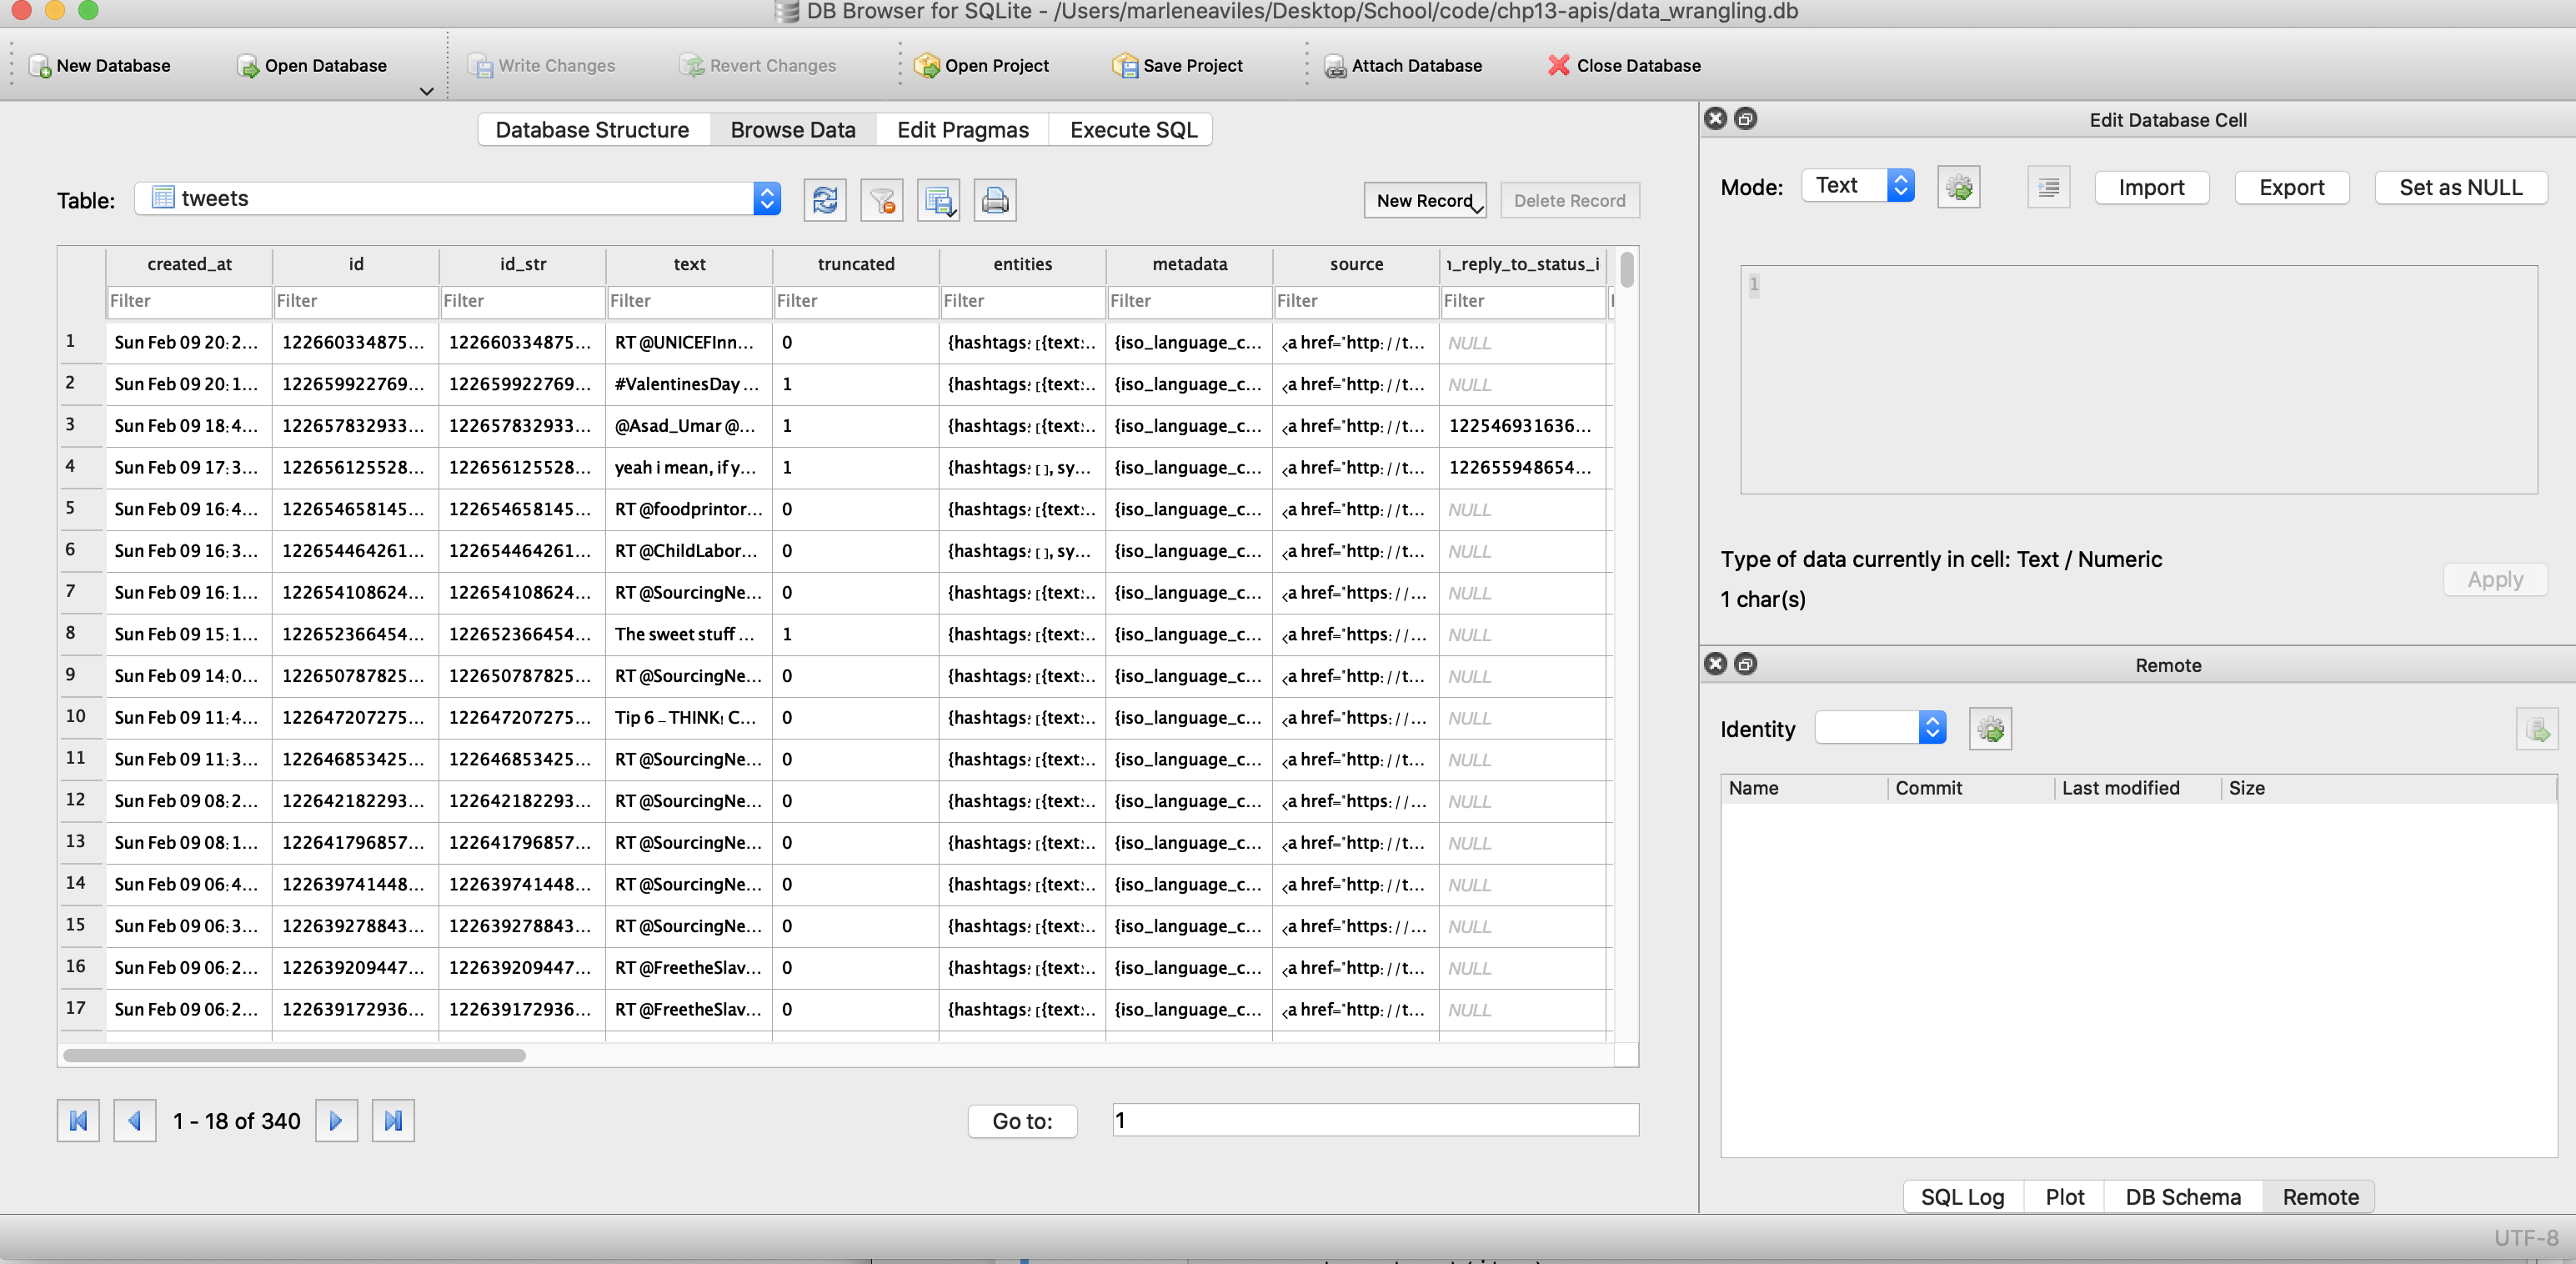

### Logging and Messaging

In [14]:
import logging
from datetime import datetime

# Start logger to crreat log file: 'daily_repirt_xxx' 
# Logging level = 'DEBUG' to allow logging messages in code

def start_logger():
    logging.basicConfig(filename='daily_report_%s.log' %
                        datetime.strftime(datetime.now(), '%m%d%Y_%H%M%S'),
                        level=logging.DEBUG,
                        format='%(asctime)s %(message)s',
                        datefmt='%m-%d %H:%M:%S')

# Importing Twilio API    
from twilio.rest import Client 
 
account_sid = '' 
auth_token = '' 
client = Client(account_sid, auth_token)

# Try/excpet was used to catch sms sucess or faiulure 

start_logger()
logging.debug("SCRIPT: Starting")
try:
    data = oauth_req(url, TOKEN_KEY, TOKEN_SECRET)
    # Succesfull sms 
    message = client.messages.create(
        to="+1", # include your phone number
        from_="+13343779770",
        body="Data Prep:SUCCESFULL AUTOMATION!")
except Exception:
    logging.exception('SCRIPT: ERROR HAS OCCURED!')
    logging.error('SCRIPT: Issue with division in the main() function')
    # Failure sms 
    message = client.messages.create(
        to="+1", #include your phone number
        from_="+13343779770",
        body="Data Prep: AUTOMATION DID NOT WORK!")
    logging.debug('SCRIPT: Finish!')
# Print sms sent
print("Text: {}\n".format(message.body))

Text: Sent from your Twilio trial account - Data Prep: AUTOMATION DID NOT WORK!



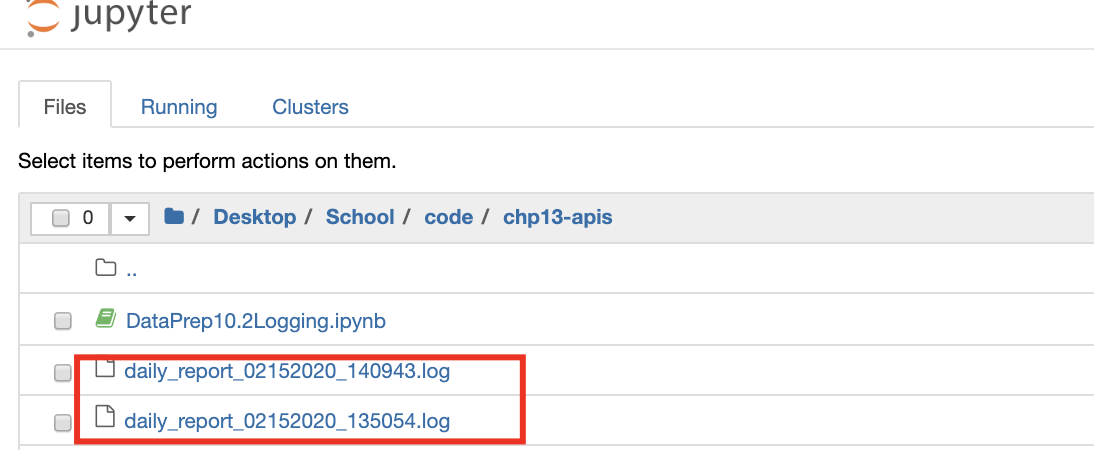

Citation:
Data Wrangling with Python
by Jacqueline Kazil, Katharine Jarmul
Released February 2016
Publisher(s): O'Reilly Media, Inc.
ISBN: 9781491948811